# http://tau-data.id/umi/

<center><img alt="" src="images/0_Cover.jpg"/></center> 

## <center><font color="blue">Modul 06: Pendahuluan Machine Learning II</font></center>
<b><center>(C) Taufik Sutanto - 2019</center>
<center>tau-data Indonesia ~ https://tau-data.id ~ taufik@tau-data.id</center>

## <center><font color="blue">Pendahuluan Machine Learning II: Supervised Methods</font></center>
<img alt="" src="images/PDS_logo.jpg" />

# <font color="blue">Workshop Schedule</font>

## <font color="green">Hari ke-3 (Rabu, 29 Jan 2020)</font>

**Pendahuluan Data Science II**
* 09:00 – 11:00 Unsupervised Learning & Regresi
* 11:00 – 12:00	Latihan
* 13:00 – 15:00	Supervised Learning - Klasifikasi
* 15:00 – 16.00	Latihan Klasifikasi

Studi Kasus: **Human Resources Analytics**


In [29]:
!pip install graphviz
!pip install dtreeviz
!pip install imblearn
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/diabetes_data.csv
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/hr_data.csv

A subdirectory or file data already exists.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [30]:
# Importing Modules untuk Notebook ini
#from imblearn.datasets import make_imbalance
import warnings; warnings.simplefilter('ignore')

import graphviz, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn import model_selection, tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from dtreeviz.trees import *
from IPython.core.display import display, HTML
from imblearn.under_sampling import NearMiss # underSampling
from imblearn.over_sampling import SMOTE # OverSampling
from imblearn.combine import SMOTEENN # Combination of the 2
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import svm, preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from collections import Counter
sns.set(style="ticks", color_codes=True)

## k-Nearest Neighbour
<img alt="" src="images/6_kNN.JPG" style="height:300px; width:711px" />

<img alt="" src="images/6_DT_meme.png" style="height:342px; width:460px" />

# Decision Tree
<img alt="" src="images/6_DT.png" style="height:336px; width:904px" />


# Interactive Explanation of a Decision Tree

* http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
* http://www.r2d3.us/visual-intro-to-machine-learning-part-2/

# More resources:

* http://www.saedsayad.com/decision_tree.htm
* 

<h3>Asumsi (induktif bias) dari&nbsp; Decision tree</h3>
<img alt="" src="images/6_asumsi_DT.JPG" style="height:300px; width:300px" />

## Lebih Tepatnya
<p><img alt="" src="images/Dec_Tree_Asumsi_Depth.png" style="width: 650px; height: 122px;" /></p>


## Teori Decision Tree : Information theory
<img alt="" src="images/dec_Tree_Theory.png" style="width: 600px; height: 337px;" />

<p><img alt="" src="images/Entropy.png" style="width: 650px; height: 290px;" /></p>


<p><img alt="" src="images/Information_Gain.png" style="width: 650px; height: 199px;" /></p>


<p><img alt="" src="images/Contoh_Entropy.png" style="width: 469px; height: 339px;" /></p>


<p><img alt="" src="images/Contoh_Gain.png" style="width: 650px; height: 456px;" /></p>
* Contoh Lain: http://www.saedsayad.com/decision_tree.htm

## Alternative to Information Gain : Gini Index (CART)
https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1

## Belum (tidak) Dibahas
* Impurity Functions
* Prunning
* Numeric variables
* Optimizations

<p><u><strong>When to use:</strong></u></p>

<ul>
	<li>Target : Binomial/nominal.</li>
	<li>Predictors (input): binomial, nominal, and-or interval (ratio).</li>
</ul>

<p><u><strong>Advantage:</strong></u></p>

<ul>
	<li>Fast and embarrassingly parallel.</li>
	<li>Tanpa iterasi, cocok untuk&nbsp;Big Data technology (e.g. Hadoop)[map-reduce friendly]</li>
	<li>Interpretability</li>
	<li>Robust terhadap outliers &amp; missing values</li>
</ul>

<p><u><strong>Disadvantage:</strong></u></p>

<ul>
	<li>Non probabilistic (ad hoc heuristic) +/-</li>
	<li>Target dengan banyak kelas</li>
	<li>Sensitive (instability)</li>
</ul>


In [31]:
# Load Data
from sklearn.datasets import load_iris

df = sns.load_dataset("iris")
df.sample(7)

,sepal_length,sepal_width,petal_length,petal_width,species
134,6.1,2.6,5.6,1.4,virginica
141,6.9,3.1,5.1,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
100,6.3,3.3,6.0,2.5,virginica
122,7.7,2.8,6.7,2.0,virginica
136,6.3,3.4,5.6,2.4,virginica
20,5.4,3.4,1.7,0.2,setosa


In [32]:
# Separate Data
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df['species']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=9)
print(X_train.shape, len(Y_test))

(105, 4) 45


<img alt="" src="images/OverFitting.png" style="width: 400px; height: 427px;" />

<p><img alt="" src="images/sweet_spot.png" style="width: 400px; height: 236px;" /></p>


In [33]:
# k-NN: http://scikit-learn.org/stable/modules/neighbors.html
from sklearn import neighbors

n_neighbors = 10
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
kNN.fit(X_train, Y_train)
print('Done!')

Done!


In [34]:
# Prediksi dengan k-NN
y_kNN = kNN.predict(X_test)
y_kNN[:5]

array(['virginica', 'versicolor', 'virginica', 'virginica', 'versicolor'],
      dtype=object)

In [35]:
print('Akurasi = ', accuracy_score(Y_test, y_kNN))
print(confusion_matrix(Y_test, y_kNN))
print(classification_report(Y_test, y_kNN))

Akurasi =  1.0
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [36]:
# Build the model and Evaluate
dt_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=9) # Default Gini
dt = dt_model.fit(X_train, Y_train)
dt_prediction = dt.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, dt_prediction))
print(confusion_matrix(Y_test, dt_prediction))
print(classification_report(Y_test, dt_prediction))

Akurasi =  0.9777777777777777
[[18  0  0]
 [ 0 14  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.93      1.00      0.97        14
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



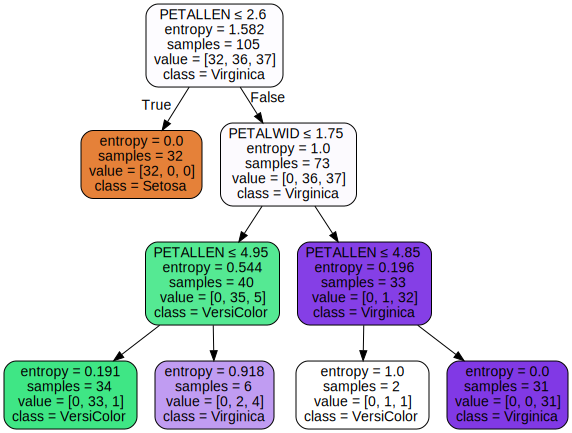

In [37]:
# May not work in Google Colab, use Anaconda
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
var_names = ['SEPALLEN','SEPALWID', 'PETALLEN','PETALWID']
categories = ['Setosa', 'VersiColor', 'Virginica']
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names = var_names,  
                         class_names=categories,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
# Interpretation is much easier from the graph
# Installing GraphViz : https://stackoverflow.com/questions/49471867/installing-graphviz-for-use-with-python-3-on-windows-10

In [38]:
# Varible importance
dt.feature_importances_

array([0.        , 0.        , 0.70559151, 0.29440849])

<img alt="" src="images/5_RandomForest.png" style="width: 592px; height: 444px;" />

# Curse of Dimensionality

<p><img alt="" src="images/chd_1.PNG" />

In [39]:
# Mari coba perbaiki dengan Random Forest
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_prediction = rf.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, rf_prediction))
print(confusion_matrix(Y_test, rf_prediction))
print(classification_report(Y_test, rf_prediction))
# Ensemble less effective on strong classifiers

Akurasi =  1.0
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Feature ranking:
1. feature 2 (0.434717)
2. feature 3 (0.427679)
3. feature 0 (0.106405)
4. feature 1 (0.031199)


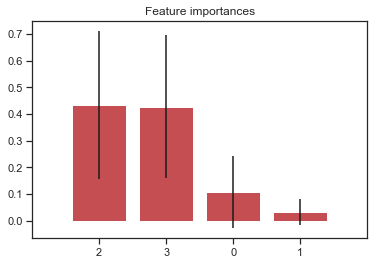

In [40]:
# Varible importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Naive Bayes Classifier

<img alt="" src="images/naive_bayes.png" style="width: 400px ; height: 220px" />

* P(x) konstan, sehingga bisa diabaikan.
* Asumsi terkuatnya adalah independensi antar variabel prediktor (sehingga dikatakan &quot;Naive&quot;)
* Klasifikasi dilakukan dengan menghitung probabilitas untuk setiap kategori ketika diberikan data x = (x1,x2,...,xm)
* Untuk data yang besar bisa menggunakan out-of-core approach (partial fit):<br />
	http://scikit-learn.org/stable/modules/scaling_strategies.html#scaling-strategies
* Variasi NBC adalah bagaimana P(c|x) dihitung, misal dengan distribusi Gaussian (Normal) - sering disebut sebagai Gaussian Naive Bayes (GNB):

<img alt="" src="images/Gaussian.png" style="width: 303px ; height: 50px" />

* very good explanation of NBC: 
* https://www.machinelearningplus.com/predictive-modeling/how-naive-bayes-algorithm-works-with-example-and-full-code/ 
* https://www.saedsayad.com/naive_bayesian.htm

<p><em><strong>Pros:</strong></em></p>

<ul>
	<li>Cepat dan mudah di implementasikan</li>
	<li>Cocok untuk permasalahan multiclass</li>
	<li>Jika asumsi terpenuhi (independent) biasanya performanya cukup baik dan membutuhkan data (training) yang lebih sedikit.</li>
	<li>Biasanya baik digunakan untuk prediktor kategorik, untuk numerik NBC mengasumsikan distribusi normal (terkadang tidak terpenuhi)&nbsp;</li>
</ul>

<p><em><strong>Cons:</strong></em></p>

<ul>
	<li>Jika di test data memuat kategori yang tidak ada di training data ( ==&gt; probabilitas = 0). Sering disebut sebagai masalah&nbsp; &ldquo;Zero Frequency&rdquo;.&nbsp;</li>
	<li>Asumsi yang sangat kuat (independen antar prediktor).</li>
</ul>


In [41]:
# Naive Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
nbc = gnb.fit(X_train, Y_train)
nbc_prediction = nbc.predict(X_test)

print('Akurasi = ', accuracy_score(Y_test, nbc_prediction))
print(confusion_matrix(Y_test, nbc_prediction))
print(classification_report(Y_test, nbc_prediction))
# Hati-hati Sparse ==> Dense bisa memenuhi memory untuk data relatif cukup besar
# Akurasi cukup baik

Akurasi =  1.0
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Evaluation Metrics II

<h2>Metrics in Python</h2>

<p><img alt="" src="images/6_Evaluasi_ML.JPG" style="height:400px; width:515px" /></p>
http://scikit-learn.org/stable/modules/model_evaluation.html

# Cross Validation

In [42]:
# Cross validation
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_val_score
import time

gnb = GaussianNB()
mulai = time.time()
scores_svm = cross_val_score(gnb, X, Y, cv=10,scoring='accuracy') # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# Interval Akurasi 95 CI 
print("Accuracy Naive Bayes Classifier: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_svm.mean(), scores_svm.std() * 2, waktu))

Accuracy Naive Bayes Classifier: 0.95 (+/- 0.09), Waktu = 0.073 detik


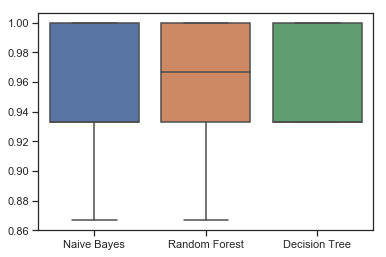

In [43]:
# Model Comparisons using Cross Validation
Models = [('Naive Bayes',gnb), ('Random Forest',rf), ('Decision Tree',dt_model)]
Scores = {}
for model_name, model in Models:
    Scores[model_name] = cross_val_score(model, X, Y, cv=10,scoring='accuracy')

dt = pd.DataFrame.from_dict(Scores)
ax = sns.boxplot(data=dt)

## Outline:

* Support Vector Machines
* Neural Network
* Ensemble Models
* Imbalance Data Problem

# Support Vector Machine (SVM)
Misal data dinyatakan sebagai berikut:
$\{(\bar{x}_1,y_1),...,(\bar{x}_n,y_n)\}$, dimana $\bar{x}_i$ adalah
input pattern untuk data ke $i^{th}$ dan $y_i$ adalah nilai target yang diinginkan. Kategori
(class) direpresentasikan dengan $y_i=\{-1,1\}$. Sebuah bidang datar (hyperplane) yang memisahkan kedua kelas ini ("linearly separable") adalah:
$$ \bar{w}'\bar{x}+b=0 $$
dimana $\bar{x}$ adalah input vector (prediktor), $\bar{w}$ weight, dan $b$ disebut sebagai bias.

## Pemodelan SVM (Hard Margin):

<img alt="" src="images/Pemodelan_SVM_.png" style="width: 250px ; height: 269px" />
* Misal **Xo** adalah sebuah vector di bidang (plane/garis) _wX + b = -1_
* Misal **r** adalah jarak antar SV-nya.
* karena **X** berada di bidang _wX+b=1_ maka  _X=Xo+rw/||w||_ 
* (lihat gambar *w* tegak lurus *X* (karena _wX+b=0_) dan _w/||w||_ adalah unit vektornya)
* Sehingga _wX+b=1_ dapat dituliskan sebagai _w(Xo+r w/||w||)-b = 1_
* atau _wXo+r||w||²/||w||-b=1_ ==> _wXo-b=1-r||w||_ ==> _-1=1-r||w||_
* sehingga di dapat $r = \frac{2}{||w||}$
* Kesimpulannya optimal hyperplane bisa didapatkan dengan memaksimumkan $\frac{2}{||w||}$ atau setara dengan $\min \frac{||w||}{2}$
* More details here: https://nlp.stanford.edu/IR-book/html/htmledition/support-vector-machines-the-linearly-separable-case-1.html

<img alt="" src="images/hard_margin_svm.png" style="width: 400px; height: 181px;" />
* Efek outlier pada pemodelan ini?

## Support Vector Machine: Soft Margin

<img alt="" src="images/6_SVM.jpg" style="height: 262px ; width: 232px" />
<img alt="" src="images/svm_opt.png" style="width: 300px; height: 106px;" />
* Apakah efek outlier masih sama pada pemodelan ini? Kaitannya dengan nilai C?

### C >>> ==> toleransi terhadap outlier <<<< dan sebaliknya

## Dual dan Quadratic solver
* optimasi di atas biasanya diselesaikan dengan mencari bentuk *Dual*-nya.
* Solusi untuk parameter optimalnya kemudian ditemukan dengan mencari pendekatan nilai optimalnya lewat Quadratic Programming solver.
* Perhatikan bahwa bentuk fungsi optimasinya konvex ==> memiliki minimum global.
* Nilai optimal dari pemodelan di atas hanya bergantung pada data-data di margin (support vector) sehingga bisa lebih efisien (jika SV telah diketahui).
* SV juga dapat digunakan untuk menganalisa "Error Bound" : http://www.svms.org/vc-dimension/

## Interpretation
* Recursive Feature Elimination (RFE) method : https://link.springer.com/content/pdf/10.1023/A:1012487302797.pdf 
* melihat bentuk kuadrat dari setiap komponen *w* (higher better).
* hati-hati beberapa diskusi di internet menyatakan bahwa sign (+/-) menyatakan tingkat kepentingan terhadap setiap variabel, namun hal ini tidak selalu benar dan bisa dibuktikan cukup dengan counter example. 

## Bagaimana dengan data kategorik?
* Sama dengan regresi (logistik) ==> Dummy (indicator variable) variable.
* Misal X1 = {a,b,c} ==> X1_a = [1,0,0], X1_b = [0,1,0], X1_c = [0,0,1]
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

In [44]:
# Contoh
df = pd.DataFrame({'X1': ['a', 'b', 'a','c','a'],'X2': [1, 2, 3, 2, 1]})
df = pd.get_dummies(df) # get_dummies(df, prefix=['dummy'])
df

,X2,X1_a,X1_b,X1_c
0,1,1,0,0
1,2,0,1,0
2,3,1,0,0
3,2,0,0,1
4,1,1,0,0


## Normalisasi/Standarisasi Data
* Sama seperti Regresi (logistik) prediktor/features di model SVM perlu untuk di standarisasi/normalisasi.
* http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range
* Hati-hati standarisasi data dilakukan setelah outlier ditangani dengan baik.

In [45]:
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True)
df['X2'] = scaler.fit_transform(df[['X2']])
df

,X2,X1_a,X1_b,X1_c
0,-1.069045,1,0,0
1,0.267261,0,1,0
2,1.603567,1,0,0
3,0.267261,0,0,1
4,-1.069045,1,0,0


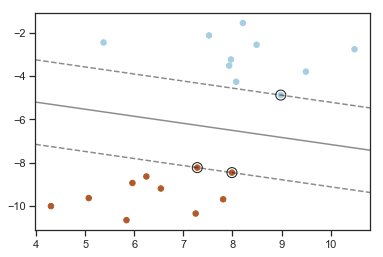

In [46]:
# Contoh plotting Optimal Hyperplane
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py

X, y = make_blobs(n_samples=20, centers=2, random_state=6) # we create 20 separable points
clf = svm.SVC(kernel='linear', C=1000) # fit the model, don't regularize for illustration purposes
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca();xlim = ax.get_xlim(); ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30);yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])# plot decision boundary and margins
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')# plot support vectors
plt.show()

<h3>SVM Kernel (trick)</h3>

<p><img alt="" src="images/6_SVM_Kernel.jpg" style="height:168px; width:306px" /></p>


## Definisi Fungsi Kernel
* Jika untuk semua $\bar{x},\bar{z} \in X$, memenuhi <br> 
$$\kappa (\bar{x},\bar{z})=<\phi (\bar{x}),\phi (\bar{z})>$$ maka $\kappa$ disebut fungsi Kernel (fungsi $\phi$ disebut *feature map*).
* Perhatikan hasil pemetaan fungsi kernelnya adalah scalar (inner product).
* Fungsi ini digunakan di SVM (dan model DM/ML lain yang bisa dinyatakan dalam inner product).
* Perhatikan pemodelan SVM; kebanyakan dinyatakan dalam inner product (i.e. w.x).
* See here for more details: https://nlp.stanford.edu/IR-book/html/htmledition/nonlinear-svms-1.html

<h3 id="Contoh-:-Lagrangian-Wolfe-Dual-dari-Optimasi-diatas">Contoh : Lagrangian Wolfe Dual dari Optimasi diatas</h3>

<p><img alt="" src="images/Lagrangian_Wolfe_Dual.png" style="width: 290px; height: 120px;" /></p>


## Contoh 1
* Misal $X\subseteq \Re^2$ dan $\phi : \bar{x}=(x_1,x_2)\rightarrow \phi (\bar{x})=(x_1^2,
x_2^2,\sqrt{2}x_1x_2)\in F=\Re^3$.
* maka <br>
$<\phi(\bar{x}),\phi(\bar{z})>$<br>
$=<(x_1^2,x_2^2,\sqrt{2}x_1x_2),(z_1^2,z_2^2,\sqrt{2}z_1z_2)>$<br>
$=x_1^2z_1^2+x_2^2z_2^2+2x_1x_2z_1z_2$<br>
$=(x_1z_1+x_2z_2)^2=<\bar{x},\bar{z}>^2$<br>
* Sehingga $\kappa(\bar{x},\bar{z})=<\bar{x},\bar{z}>^2$ adalah sebuah fungsi kernel dan $F$ adalah ruang feature-nya (feature space).

## Contoh 2
* Misal x = (x1, x2, x3); y = (y1, y2, y3). 
* dan fungsi pemetaan variabelnya f(x) = (x1², x1x2, x1x3, x2x1, x2², x2x3, x3x1, x3x2, x3²), 
* maka kernelnya adalah K(x, y ) = <f(x), f(y)> = <x, y>².
* Contoh numerik misal x = (1, 2, 3) dan y = (4, 5, 6). maka:
* f(x) = (1, 2, 3, 2, 4, 6, 3, 6, 9) <br> f(y) = (16, 20, 24, 20, 25, 30, 24, 30, 36)
* <f(x), f(y)> = 16 + 40 + 72 + 40 + 100+ 180 + 72 + 180 + 324 = 1024
* complicated!... Menggunakan fungsi kernel perhitungannya bisa disederhanakan:
* K(x, y) = (4 + 10 + 18)² = 32² = 1024

<h2 id="Well-Known-Kernel-Functions">Well-Known Kernel Functions</h2>

<p><img alt="" src="images/Well-Known_Kernels.png" style="width: 400px; height: 208px;" /></p>


<h3>SVM Binary to MultiClass</h3>

<p><img alt="" src="images/6_SVM_Ova.jpg" style="height:314px; width:432px" /></p>


<p><b>Pros</b></p>

<ul>
	<li>Akurasinya Baik</li>
	<li>Bekerja dengan baik untuk sampel data yang relatif kecil</li>
	<li>Hanya bergantung pada SV ==&gt; meningkatkan efisiensi</li>
	<li>Convex ==&gt; Minimum Global ==&gt; Pasti Konvergen</li>
</ul>

<p><b>Cons</b></p>

<ul>
	<li>Tidak efisien untuk data yang besar</li>
	<li>Akurasi terkadang rendah untuk multiklasifikasi (sulit mendapatkan hubungan antar kategori di modelnya)</li>
	<li>Tidak robust terhadap noise</li>
</ul>


In [47]:
# Contoh Binary SVM (dengan dan tanpa kernel)
# Loading Data
df = sns.load_dataset("iris")
df2 = df[df['species'].isin(['setosa','versicolor'])]
print(df2.shape)
df2.sample(7)

(100, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
42,4.4,3.2,1.3,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
72,6.3,2.5,4.9,1.5,versicolor
29,4.7,3.2,1.6,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
84,5.4,3.0,4.5,1.5,versicolor
78,6.0,2.9,4.5,1.5,versicolor


In [48]:
# Separate the data
X = df2[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df2['species']
seed = 9
validation_size = 0.3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape, len(Y_test))

(70, 4) 30


In [49]:
# Fitting and evaluate the model
dSVM = svm.SVC(C = 10**5, kernel = 'linear')
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
print(confusion_matrix(Y_test, y_SVM))
print(classification_report(Y_test, y_SVM))

Akurasi =  1.0
[[18  0]
 [ 0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [50]:
# The Support Vectors
print('index dr SV-nya: ', dSVM.support_)
print('Vector Datanya: \n', dSVM.support_vectors_)

index dr SV-nya:  [21 37]
Vector Datanya: 
 [[4.8 3.4 1.9 0.2]
 [5.1 2.5 3.  1.1]]


In [51]:
# Model Weights for interpretations
print('w = ',dSVM.coef_)
print('b = ',dSVM.intercept_)

w =  [[ 0.20547963 -0.61643888  0.7534253   0.61643888]]
b =  [-1.44520713]


In [52]:
# Menggunakan Kernel: http://scikit-learn.org/stable/modules/svm.html#svm-kernels
for kernel in ('sigmoid', 'poly', 'rbf'):
    dSVM = svm.SVC(kernel=kernel)
    dSVM.fit(X_train, Y_train)
    y_SVM = dSVM.predict(X_test)
    print(accuracy_score(Y_test, y_SVM))

0.4
1.0
1.0


In [53]:
# Contoh Multiklasifikasi SVM (dengan dan tanpa kernel)
# Separate the data
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df['species']
seed = 9
validation_size = 0.3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape, len(Y_test))

(105, 4) 45


In [54]:
# One Versus All: http://www.jmlr.org/papers/volume5/rifkin04a/rifkin04a.pdf
dSVM = svm.LinearSVC()
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
y_SVM

Akurasi =  1.0


array(['virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica'], dtype=object)

In [55]:
# Ada 3 classifier (as expected)
dSVM.coef_

array([[ 0.2110198 ,  0.39116303, -0.78332167, -0.39840012],
       [ 0.08611332, -0.73078928,  0.26964371, -0.67411312],
       [-0.78622835, -0.97123276,  1.3530966 ,  1.59068892]])

In [56]:
# All At Once Method http://www.jmlr.org/papers/volume2/crammer01a/crammer01a.pdf
dSVM = svm.SVC(decision_function_shape='ovo')
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
y_SVM

Akurasi =  0.9777777777777777


array(['virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica'], dtype=object)

<h1 id="Artificial-Neural-Network---Jaringan-Syaraf-tiruan">Artificial Neural Network - Jaringan Syaraf Tiruan</h1>

<p><img alt="" src="images/JST.jpg" style="width: 600px; height: 362px;" /></p>


<img alt="" src="images/6_JST.JPG" style="height:400px; width:706px" />

<p><img alt="" src="images/6_JST_calculation.JPG" style="height:350px; width:638px" /></p>


<img alt="" src="images/6_JST_Actv.png" style="height:400px; width:484px" />

<h2 id="Toy-Data-Example-Neural-Network-(Back-Propagation)">Toy Data Example Neural Network (Back Propagation)</h2>

<p><img alt="" src="images/NN-BP_step_1.png" style="width: 600px; height: 358px;" /></p>


<img alt="" src="images/NN-BP_step_2.png" style="width: 600px; height: 348px;" />

<p><img alt="" src="images/NN-BP_step_3.png" style="width: 600px; height: 313px;" /></p>


<p><img alt="" src="images/NN-BP_step_4.png" style="width: 600px; height: 305px;" /></p>


<p><img alt="" src="images/NN-BP_step_5.png" style="width: 600px; height: 305px;" /></p>


<img alt="" src="images/NN-BP_step_6.png" style="width: 600px; height: 304px;" />

<p><img alt="" src="images/NN-BP_step_7.png" style="width: 600px; height: 305px;" /></p>


<p><img alt="" src="images/NN-BP_step_8.png" style="width: 600px; height: 303px;" /></p>


<p><img alt="" src="images/NN-BP_step_9.png" style="width: 600px; height: 301px;" /></p>


## Multiclass ANN
<img alt="" src="images/Multiclass_ANN.png" style="width: 600px; height: 468px;" />

### Melihat pemodelan Matematis dan cara kerja Neural Network, apakah kita perlu melakukan standarisasi data juga seperti SVM dan Regresi Logistic?

<p>Neural Network - Empirical Analysis Parameter di ANN</p>
<strong><a href="https://goo.gl/3rcnc9" target="_blank">https://goo.gl/3rcnc9</a></strong>


<p>Mengapa dengan fungsi linear bisa membentuk &quot;boundary&quot; yang melengkung (kurva)?</p>
<strong><a href="http://s.id/j6i" target="_blank">http://s.id/j6i</a></strong>

<p><img alt="" src="images/6_tipe_NN.png" style="height:400px; width:711px" /></p>


### Neural Network VS Deep Learning
<img alt="" src="images/5_DeepLearning.png" style="width: 600px; height: 676px;" />

<p><img alt="" src="images/6_NN_when_to_use.JPG" style="height:400px; width:499px" /></p>

In [57]:
# Neural Network: http://scikit-learn.org/stable/modules/neural_networks_supervised.html
NN = MLPClassifier(hidden_layer_sizes=(100,))# 2 layers 30 neurons and 20 neurons
NN.fit(X_train, Y_train)
y_NN = NN.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_NN))

Akurasi =  1.0


## Induktif bias :
<ul>
	<li>Bias penaksiran parameter (statistik)</li>
	<li>Induktif Bias Sample (Machine Learning - Tom Mitchel)</li>
	<li>Induktif Bias Pemilihan Classifier (Statistical Learning Theory - Vapnik)</li>
</ul>
<img alt="" src="images/inductive_biases_.png" style="width: 600px; height: 153px;" />

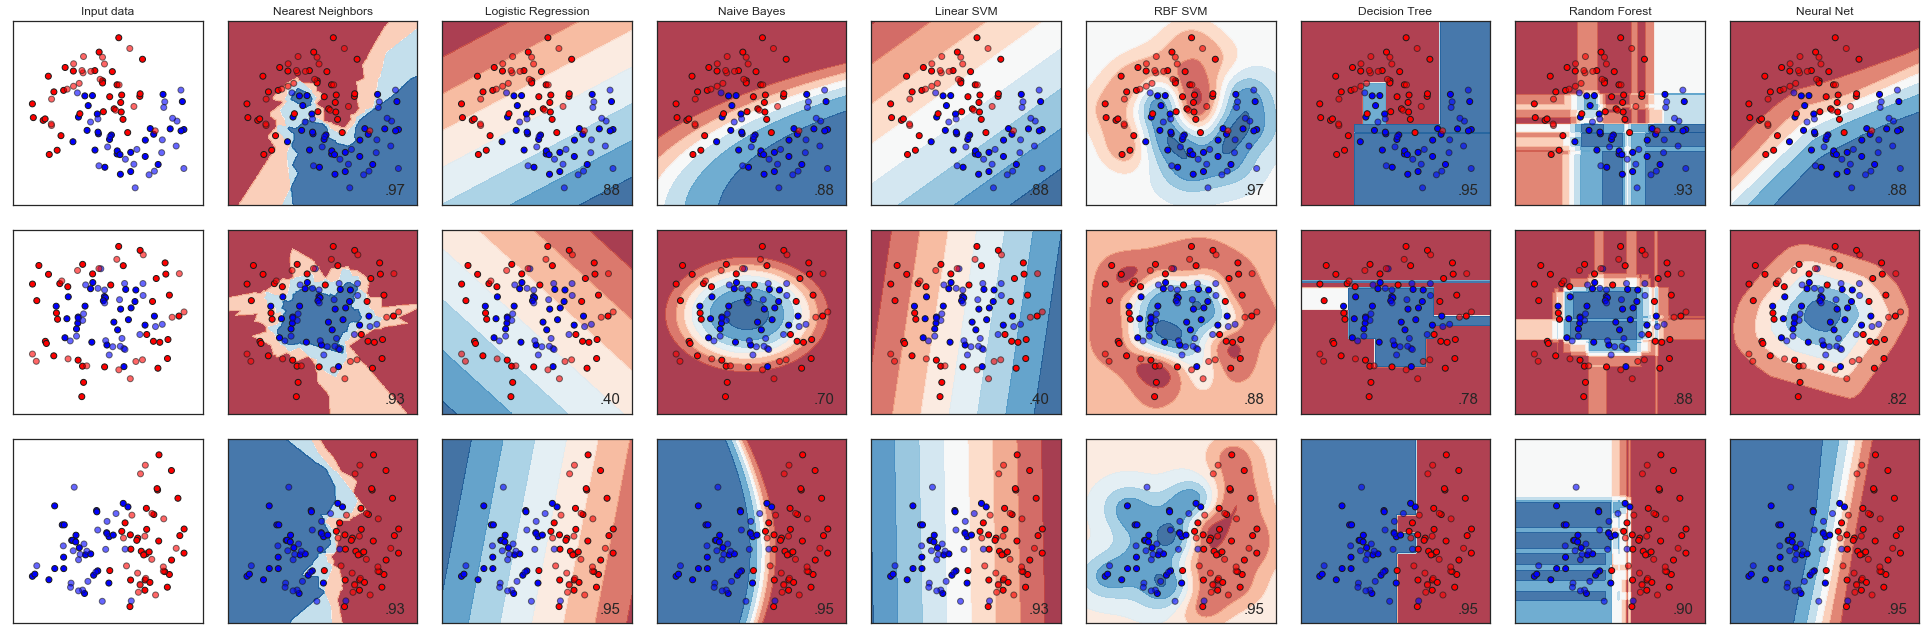

In [58]:
h, i = .02, 1  # step size in the mesh , iterate over datasets
names = ["Nearest Neighbors", "Logistic Regression", "Naive Bayes", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net"]

classifiers = [KNeighborsClassifier(3),
    LogisticRegression(solver='lbfgs',multi_class='multinomial'),
    GaussianNB(), SVC(kernel="linear", C=0.025), SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),make_circles(noise=0.2, factor=0.5, random_state=1),linearly_separable]
figure = plt.figure(figsize=(27, 9))

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = preprocessing.StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max()); ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(()); ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max());ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(()); ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout();plt.show()

<h2 id="Ensemble-Model">Ensemble Model</h2>

<ul>
	<li>What? a learning algorithms that construct a set of classifiers and then classify new data points by taking a (weighted) vote of their predictions.</li>
	<li>Why? Better prediction, More stable model</li>
	<li>How? Bagging &amp; Boosting</li>
</ul>
<img alt="" src="images/Ensemble.png" style="width: 500px; height: 213px;" />

## “meta-algorithms” : Bagging & Boosting
* Ensemble https://www.youtube.com/watch?v=Un9zObFjBH0 
* Bagging https://www.youtube.com/watch?v=2Mg8QD0F1dQ 
* Boosting https://www.youtube.com/watch?v=GM3CDQfQ4sw

<p><img alt="" src="images/Bagging_VS_Boosting.png" style="width: 500px; height: 185px;" /></p>


<img alt="" src="images/Bagging-Boosting_Usage.png" style="width: 500px; height: 281px;" />

<h2 id="Ada-Boost">AdaBoost</h2>
<ul>
	<li><a href="https://youtu.be/BoGNyWW9-mE?t=70" target="_blank">https://youtu.be/BoGNyWW9-mE?t=70</a></li>
</ul>
<img alt="" src="images/AdaBoost.png" style="width: 400px; height: 332px;" />

In [59]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv('data/diabetes_data.csv').values

In [60]:
# Contoh Voting (Bagging) di Python
# Catatan : Random Forest termasuk Bagging Ensemble (walau modified)
X, Y = data[:,0:8], data[:,8] # Slice
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

kNN = KNeighborsClassifier(3)
kNN.fit(X_train, Y_train)
Y_kNN = kNN.score(X_test, Y_test)

DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, Y_train)
Y_DT = DT.score(X_test, Y_test)

model = VotingClassifier(estimators=[('k-NN', kNN), ('Decision Tree', DT)], voting='hard')
model.fit(X_train,Y_train)
Y_Vot = model.score(X_test,Y_test)

print('Akurasi k-NN', Y_kNN)
print('Akurasi Decision Tree', Y_DT)
print('Akurasi Votting', Y_Vot)

Akurasi k-NN 0.6666666666666666
Akurasi Decision Tree 0.7012987012987013
Akurasi Votting 0.7056277056277056


In [61]:
# Averaging juga bisa digunakan di Klasifikasi (ndak hanya Regresi), 
# tapi kita pakai probabilitas dari setiap kategori
T = DecisionTreeClassifier()
K = KNeighborsClassifier()
R= LogisticRegression()

T.fit(X_train,Y_train)
K.fit(X_train,Y_train)
R.fit(X_train,Y_train)

y_T=T.predict_proba(X_test)
y_K=K.predict_proba(X_test)
y_R=R.predict_proba(X_test)

Ave = (y_T+y_K+y_R)/3
print(Ave[:5]) # Print just first 5
prediction = [v.index(max(v)) for v in Ave.tolist()]
print(prediction[:5]) # Print just first 5
print('Akurasi Averaging', accuracy_score(Y_test, prediction))

[[0.88364753 0.11635247]
 [0.82656521 0.17343479]
 [0.76975885 0.23024115]
 [0.96745177 0.03254823]
 [0.95296831 0.04703169]]
[0, 0, 0, 0, 0]
Akurasi Averaging 0.7316017316017316


In [62]:
# AdaBoost
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=9)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=1)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7511107313738893


<h2 id="Imbalance-Data">Imbalance Data</h2>
* Metric Trap
* Akurasi kategori tertentu lebih penting
* Contoh kasus
<img alt="" src="images/imbalance.png" />

<ul>
	<li>Undersampling</li>
	<li>Oversampling</li>
	<li>Model Based (weight adjustment)</li>
</ul>
<img alt="" src="images/under-over-sampling.png" style="width: 500px; height: 147px;" />
* https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
* Plot perbandingan: https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/combine/plot_comparison_combine.html#sphx-glr-auto-examples-combine-plot-comparison-combine-py

In [63]:
# Contoh undersampling
# jalankan perintah ini di terminal/command prompt: 
# "pip install imblearn" (Jupyter harus ditutup terlebih dahulu)
from imblearn.under_sampling import NearMiss # underSampling
from imblearn.over_sampling import SMOTE # OverSampling
from imblearn.combine import SMOTEENN # Combination of the 2
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced


print('Training target statistics: {}'.format(Counter(Y_train)))
print('Testing target statistics: {}'.format(Counter(Y_test)))

dSVM = svm.LinearSVC()
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test); del dSVM
print('Original Results:',classification_report(Y_test, y_SVM))

nm = NearMiss(random_state=1)
X_res, Y_res = nm.fit_resample(X_train, Y_train)
dSVM = svm.LinearSVC()
dSVM.fit(X_res, Y_res)
y_SVM = dSVM.predict(X_test); del dSVM
print('UnderSampling Results:\n',classification_report_imbalanced(Y_test, y_SVM))

sm = SMOTE(random_state=1)
X_res, Y_res = sm.fit_resample(X_train, Y_train)
dSVM = svm.LinearSVC()
dSVM.fit(X_res, Y_res)
y_SVM = dSVM.predict(X_test); del dSVM
print('OverSampling Results:\n',classification_report_imbalanced(Y_test, y_SVM))


smo = SMOTEENN(random_state=1)
X_res, Y_res = smo.fit_resample(X_train, Y_train)
dSVM = svm.LinearSVC()
dSVM.fit(X_res, Y_res)
y_SVM = dSVM.predict(X_test)
print('Combination Results:\n',classification_report_imbalanced(Y_test, y_SVM))

Training target statistics: Counter({0.0: 348, 1.0: 188})
Testing target statistics: Counter({0.0: 152, 1.0: 79})
Original Results:               precision    recall  f1-score   support

         0.0       0.76      0.86      0.80       152
         1.0       0.63      0.47      0.54        79

    accuracy                           0.72       231
   macro avg       0.69      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231

UnderSampling Results:
                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.74      0.82      0.46      0.78      0.61      0.39       152
        1.0       0.57      0.46      0.82      0.51      0.61      0.36        79

avg / total       0.69      0.70      0.58      0.69      0.61      0.38       231

OverSampling Results:
                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.67      1.00      0.04      0.80      0.19      0.04   

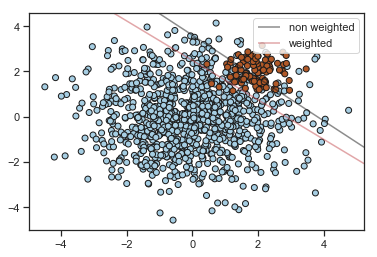

In [64]:
# Example of model-based imbalance treatment - SVM
n_samples_1, n_samples_2 = 1000, 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],centers=centers,cluster_std=clusters_std,random_state=0, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10}) #WEIGHTED SVM
wclf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')# plot the samples
ax = plt.gca()# plot the decision functions for both classifiers
xlim = ax.get_xlim(); ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)# create grid to evaluate model
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)# get the separating hyperplane
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-']) # plot decision boundary and margins
Z = wclf.decision_function(xy).reshape(XX.shape)# get the separating hyperplane for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])# plot decision boundary and margins for weighted classes
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"], loc="upper right")
plt.show()

## Weighted Decision Tree

In [65]:


del T
T = DecisionTreeClassifier(random_state = 0)
T.fit(X_train,Y_train)
y_DT = T.predict(X_test)
print('Akurasi  (Decision tree Biasa) = ', accuracy_score(Y_test, y_DT))
print(classification_report(Y_test, y_DT))

del T
T = DecisionTreeClassifier(class_weight = 'balanced', random_state = 0)
T.fit(X_train,Y_train)
y_DT = T.predict(X_test)
print('Akurasi  (Weighted Decision tree) = ', accuracy_score(Y_test, y_DT))
print(classification_report(Y_test, y_DT))

Akurasi  (Decision tree Biasa) =  0.7142857142857143
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79       152
         1.0       0.60      0.51      0.55        79

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.71      0.71      0.71       231

Akurasi  (Weighted Decision tree) =  0.6536796536796536
              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       152
         1.0       0.49      0.41      0.44        79

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.60       231
weighted avg       0.64      0.65      0.64       231



# Latihan dengan menganalisa data "hr_data.csv"

# <center><font color="blue"> End of Module IV

<hr />
<p><img alt="" src="images/meme_09_Predictive_model_insights.jpg" /></p>